In [79]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Iris dataset

### Importing dataset

In [80]:
iris = pd.read_csv('Iris.csv')
iris.drop('Id', axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Check for null values

In [82]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Coverting 'Species' to numeric values

In [83]:
from sklearn.preprocessing import LabelEncoder as le

numeric_iris = iris.drop('Species', axis=1)
numeric_iris['Species'] = le().fit_transform(iris['Species'])
numeric_iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Correlation matrix

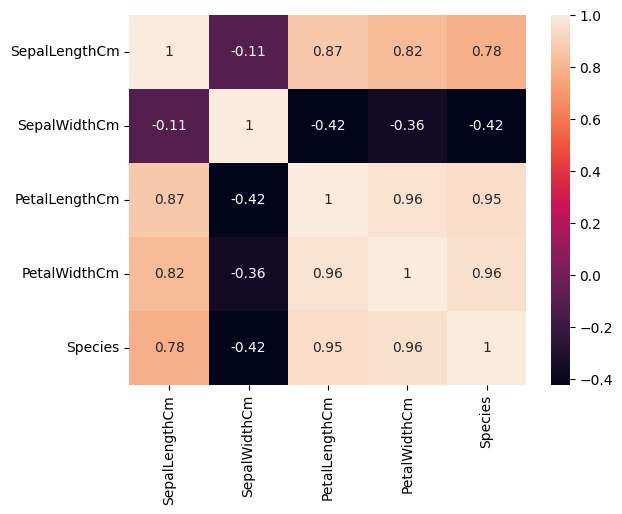

In [84]:
sb.heatmap(numeric_iris.corr(), annot=True)
plt.show()


### Splitting train and test data

In [85]:
from sklearn.model_selection import train_test_split

x = numeric_iris.drop('Species', axis=1)
y = numeric_iris.Species

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0, stratify=y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(120, 4)
(30, 4)
(120,)
(30,)


### Classifying using KNN

Actual class: [0 1 0 2 0 1 2 0 0 1 2 1 1 2 1 2 2 1 1 0 0 2 2 2 0 1 1 2 0 0]
predictions: [0 1 0 2 0 1 2 0 0 1 2 1 1 2 1 2 2 1 1 0 0 2 2 2 0 1 1 2 0 0]
Accuracy: 100.0 %
Confusion matrix:


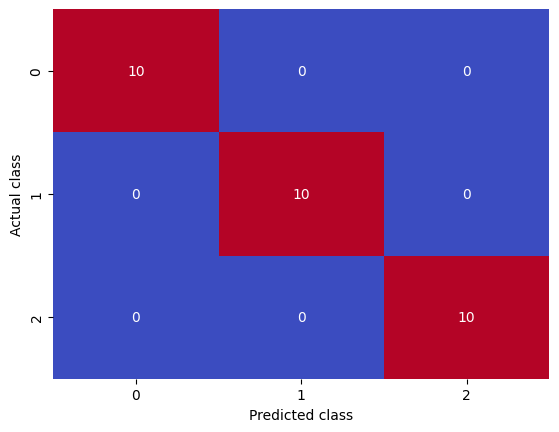

In [86]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

knn_clf = KNN(n_neighbors=3)
knn_clf.fit(x_train, y_train)
pred = knn_clf.predict(x_test)
print("Actual class:", y_test.values)
print("predictions:", pred)
print("Accuracy:", accuracy_score(y_test, pred) * 100, "%")
print("Confusion matrix:")
confusion_matrix = confusion_matrix(y_test, pred)
sb.heatmap(confusion_matrix, cmap='coolwarm', annot=True, cbar=False).set(
    xlabel='Predicted class', ylabel='Actual class')
plt.show()


### Precision, F1 score, error rate and sensetivity

In [87]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, pred))
print("Error rate: ", 1-(accuracy_score(y_test, pred)))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Error rate:  0.0


### ROC graph

#### In Iris dataset we have 3 different classes for "Species"
#### which cause the confusion matrix to be a 3x3 matrix
#### therefore TP,FP,TN and FN are all matrices
#### causing me trouble when I try to plot ROC graph
#### when I searched for a solution couldn't find a clear answer

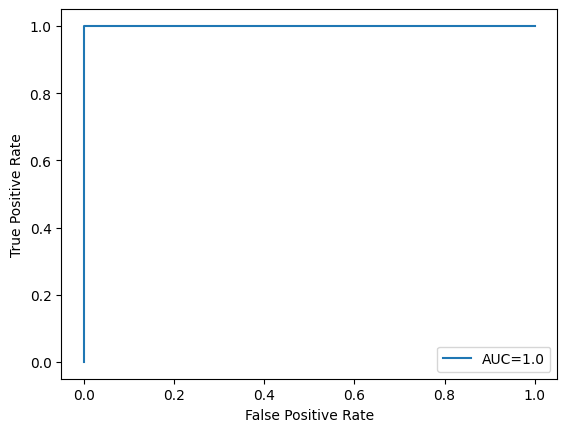

In [88]:
from sklearn import metrics

FPrate, TPrate, _ = metrics.roc_curve(y_test, pred, pos_label=2)
auc = metrics.auc(FPrate, TPrate)
plt.plot(FPrate, TPrate, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
